# Part I: Clustering

## Load data

In [ ]:
from sklearn.datasets import fetch_covtype
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
data_set= fetch_covtype()
df_features = pd.DataFrame(data_set.data, columns=data_set.feature_names)

In [ ]:
#Create DataFrame for target labels
df_target = pd.DataFrame(data_set.target, columns=['target'])
# Concatenate features and target labels DataFrames horizontally
df = pd.concat([df_features, df_target], axis=1)
print(df)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596.0    51.0    3.0                             258.0   
1          2590.0    56.0    2.0                             212.0   
2          2804.0   139.0    9.0                             268.0   
3          2785.0   155.0   18.0                             242.0   
4          2595.0    45.0    2.0                             153.0   
...           ...     ...    ...                               ...   
581007     2396.0   153.0   20.0                              85.0   
581008     2391.0   152.0   19.0                              67.0   
581009     2386.0   159.0   17.0                              60.0   
581010     2384.0   170.0   15.0                              60.0   
581011     2383.0   165.0   13.0                              60.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0.0                            510.0   
1        

In [ ]:
df['target'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen',
                      6:'Douglas-fir', 7:'Krummholz'}, inplace=True)

# Verify column names
print(df.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'S

Text(0.5, 1.0, 'Distribution over the classess ')

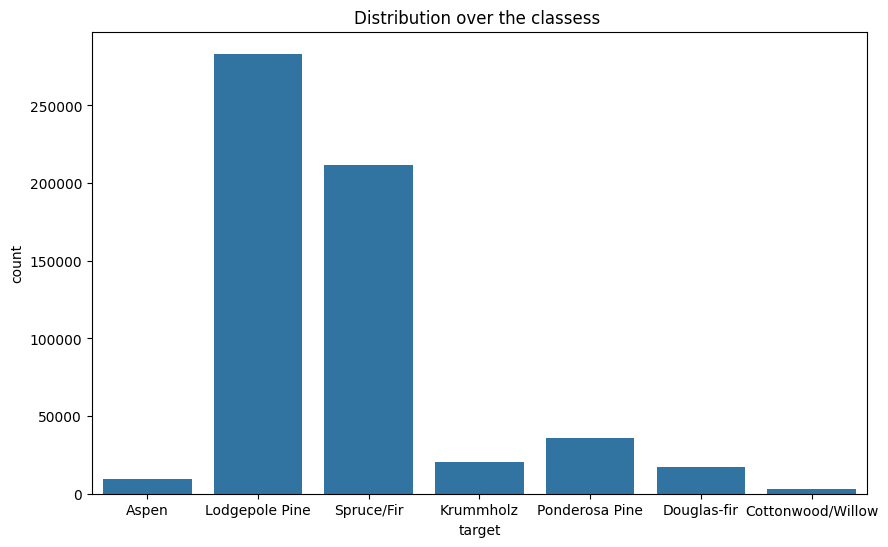

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="target", data=df)
plt.title('Distribution over the classess ') # the output hilights the need of balancing the dataset.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import numpy as np
pipeline = Pipeline([
    ('oversampling', SMOTE(sampling_strategy='auto')),  # Oversampling minority classes
    ('undersampling', RandomUnderSampler(sampling_strategy='auto')),  # Undersampling majority classes
    ('clustering', KMeans(n_clusters=7, n_init=25, random_state=1234))  # Clustering with KMeans
])
pipeline.fit(df_features, df_target)
cluster_labels = pipeline.predict(df_features)

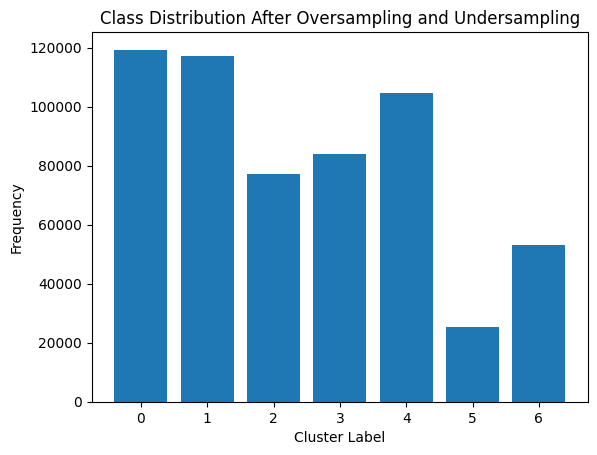

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each cluster label
label_counts = np.bincount(cluster_labels)

# Plot the bar graph
plt.bar(range(len(label_counts)), label_counts)
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title('Class Distribution After Oversampling and Undersampling')
plt.show()

In [ ]:
df_features['Pythagorian_distance'] = ((df_features['Horizontal_Distance_To_Hydrology'] ** 2) + (df_features['Vertical_Distance_To_Hydrology'] ** 2))
df_features['Pythagorian_distance']=(df_features['Pythagorian_distance']**0.50)
print(df_features['Pythagorian_distance']) # here pythagorus therorem is implemented to reduce the dimensionality.


0         258.000000
1         212.084889
2         275.769832
3         269.235956
4         153.003268
             ...    
581007     86.683332
581008     68.066144
581009     60.406953
581010     60.207973
581011     60.133186
Name: Pythagorian_distance, Length: 581012, dtype: float64


In [ ]:
df_features.drop(["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1, inplace=True)

In [ ]:
bottom_column = 'Pythagorian_distance'
df_features.insert(7, bottom_column, df_features.pop(bottom_column))

In [ ]:
all_numeric_data = df_features.iloc[:, :13]
all_boolean_data = df.iloc[:, 13:-1]

In [ ]:
all_numeric_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Pythagorian_distance,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,2350.146611,212.146049,223.318716,142.528263,276.065482,1980.291226,0.448865,0.051434,0.436074,0.063627
std,279.984734,111.913721,7.488242,1559.254870,26.769889,19.768697,38.274529,217.047653,1324.195210,0.497379,0.220882,0.495897,0.244087
min,1859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,1106.000000,198.000000,213.000000,119.000000,108.461975,1024.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,1997.000000,218.000000,226.000000,143.000000,229.477668,1710.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,3328.000000,231.000000,237.000000,168.000000,393.814677,2550.000000,1.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,66.000000,7117.000000,254.000000,254.000000,254.000000,1418.916840,7173.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_all_numeric_data = pd.DataFrame(scaler.fit_transform(all_numeric_data))
scaled_all_numeric_data.columns = all_numeric_data.columns

# aggregate scaled_num_data and cat_data together
Concated_data = pd.concat([scaled_all_numeric_data, all_boolean_data], axis=1, join='inner')

In [ ]:
Concated_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Pythagorian_distance,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
count,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,-3.819486e-16,-3.913408e-17,6.417988e-17,2.191508e-17,5.060036e-16,3.025064e-16,-1.385346e-16,5.619653e-16,1.565363e-17,2.019318e-16,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,-3.930094e+00,-1.390866e+00,-1.883448e+00,-1.507225e+00,-7.924808e+00,-1.129659e+01,-3.723844e+00,-1.271913e+00,-1.495469e+00,-9.024621e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.370487e-01,-8.726087e-01,-6.815629e-01,-7.979117e-01,-5.284318e-01,-5.219730e-01,-6.147243e-01,-7.721975e-01,-7.221685e-01,-9.024621e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.308455e-01,-2.560618e-01,-1.473917e-01,-2.264844e-01,2.186769e-01,1.356329e-01,1.232511e-02,-2.146434e-01,-2.041175e-01,-9.024621e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.273071e-01,9.323547e-01,5.203224e-01,6.271292e-01,7.042976e-01,6.920686e-01,6.655016e-01,5.425044e-01,4.302306e-01,1.108080e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.209587e+00,1.825901e+00,6.930377e+00,3.057138e+00,1.563473e+00,1.552015e+00,2.912429e+00,5.265444e+00,3.921411e+00,1.108080e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA (n_components=10)
pca_Concated_data = pca.fit_transform(Concated_data)

In [ ]:

n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(Concated_data.columns.values)
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
pca_Concated_data_df = pd.DataFrame(data=pca_Concated_data, columns=most_important_names)
pca_Concated_data_df.head()

,Wilderness_Area_0,Hillshade_3pm,Wilderness_Area_2,Slope,Wilderness_Area_1,Pythagorian_distance,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Roadways,Aspect,Slope
0,-1.993153,0.369594,1.300267,-1.104581,0.276258,0.569802,2.960797,1.663728,0.524763,0.052073
1,-1.961361,0.246496,1.364053,-1.348335,0.272785,0.436779,2.955417,1.691905,0.550359,0.060434
2,-2.514471,-0.114040,1.158513,-0.312979,-0.070475,0.466951,2.455748,0.268487,-0.640802,-0.113520
3,-2.202977,0.359900,1.205116,0.313405,-0.074047,0.183859,2.414132,0.237870,-1.410202,-0.706850
4,-1.969673,0.353910,1.402052,-1.440272,0.246215,0.213181,2.930509,1.623577,0.636227,0.056123


In [ ]:
print('The variance is summed at', round(pca.explained_variance_ratio_.sum(), 4))
print(pca.explained_variance_ratio_) # 92% of variance shows good extraction from dataset.

The variance is summed at 0.9246
[0.209557   0.18686917 0.13523375 0.09188442 0.08723529 0.06364055
 0.05336032 0.0388256  0.03311727 0.02484977]


## Clustering methods used

The clustering methods we have used are as follows:


1.   K-Means Clustering
2.   Gaussian mixture models (GMM) Clustering
3.   DBSCAN Clustering
4.   Birch Clustering
5.   Mini Batch K-means Clustering



## Training (code)

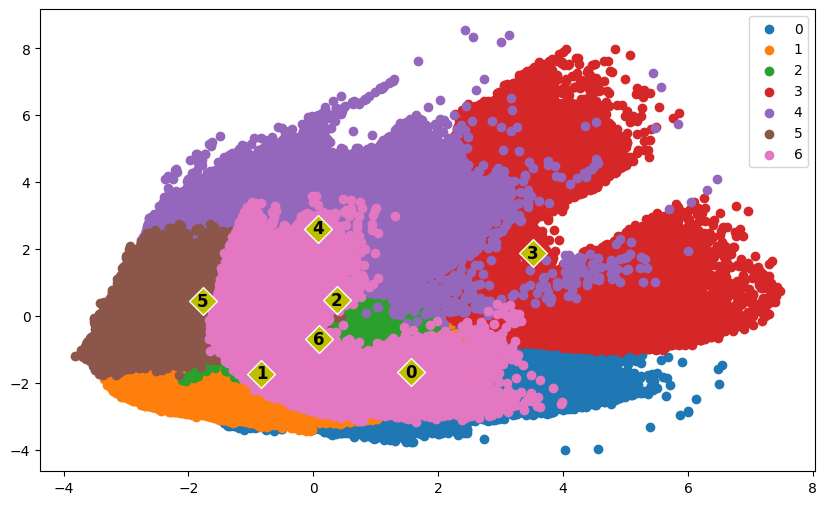

In [ ]:
kmeans = KMeans(n_clusters=7,n_init=25, random_state=1234)
label = kmeans.fit_predict(pca_Concated_data)

pca_Concated_data_df['Cluster'] = label
u_labels = np.unique(label)
plt.figure(figsize=(10, 6))
# plotting the results

centroids_of_Clusters = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(pca_Concated_data[label == i , 0] , pca_Concated_data[label == i , 1] , label=i)

for i, centroid in enumerate(centroids_of_Clusters):
    plt.scatter(centroid[0], centroid[1], s = 200, color = 'y', marker = 'D', ec='white')
    plt.text(centroid[0], centroid[1], str(i), ha='center', va='center', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

In [ ]:
kmeans.inertia_

3243466.8343292605

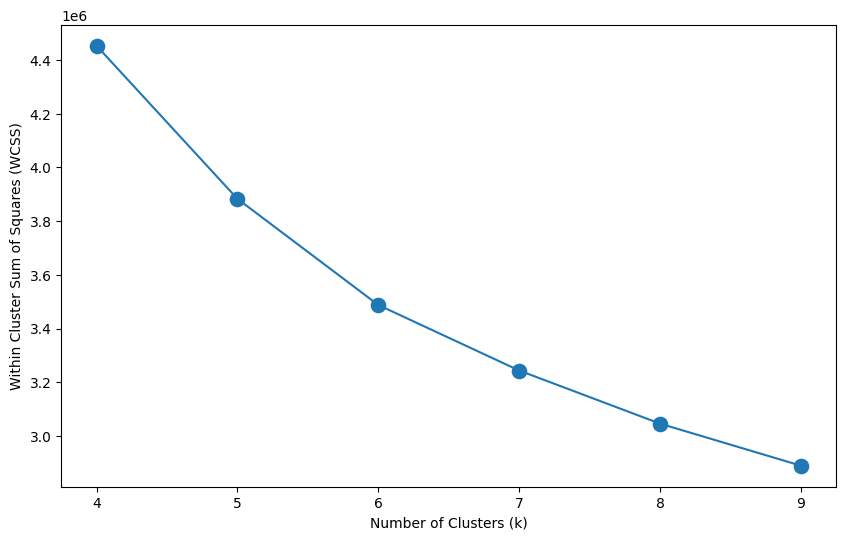

In [ ]:
List_wcss = []
for k in range(4, 10):
    kmeans = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    kmeans.fit(pca_Concated_data)
    List_wcss.append(kmeans.inertia_)

wcss_series = pd.Series(List_wcss, index = range(4, 10))

plt.figure(figsize=(10, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)',
           ylabel = 'Within Cluster Sum of Squares (WCSS)')

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
k_values = [5, 6, 7]
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=1234)
    kmeans.fit(pca_Concated_data)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(pca_Concated_data, cluster_labels))
# Print silhouette scores
for k, silhouette_score_value in zip(k_values, silhouette_scores):
    print(f"Silhouette Score for k={k}: {silhouette_score_value}")

Silhouette Score for k=5: 0.2552299721398424
Silhouette Score for k=6: 0.25602152012261664
Silhouette Score for k=7: 0.24539414155941372


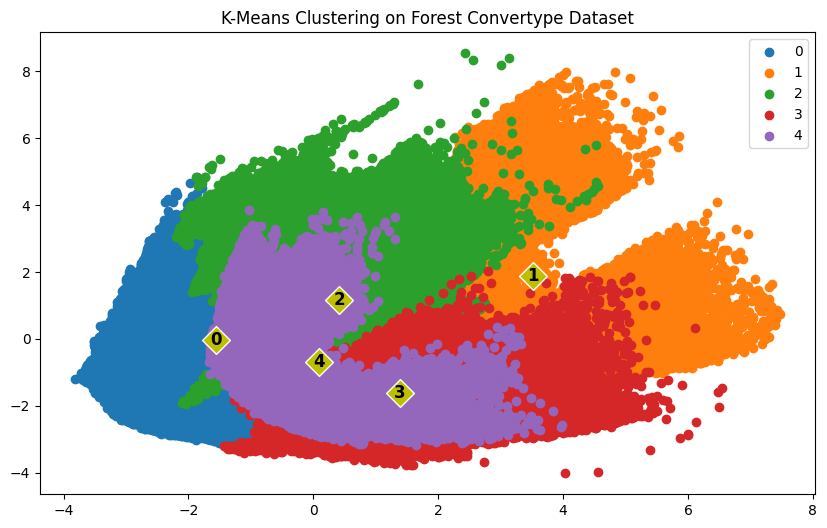

In [ ]:
kmeans = KMeans(n_clusters=5,n_init=25, random_state=1234)
cluster_labels_kmeans = kmeans.fit_predict(pca_Concated_data)

pca_Concated_data_df['Cluster'] = cluster_labels_kmeans
u_labels = np.unique(cluster_labels_kmeans)
plt.figure(figsize=(10, 6))
# plotting the results

centroids_of_Clusters = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(pca_Concated_data[cluster_labels_kmeans == i , 0] , pca_Concated_data[cluster_labels_kmeans == i , 1] , label=i)

for i, centroid in enumerate(centroids_of_Clusters):
    plt.scatter(centroid[0], centroid[1], s = 200, color = 'y', marker = 'D', ec='white')
    plt.text(centroid[0], centroid[1], str(i), ha='center', va='center', fontsize=12, fontweight='bold')
plt.title('K-Means Clustering on Forest Convertype Dataset')
plt.legend()
plt.show()

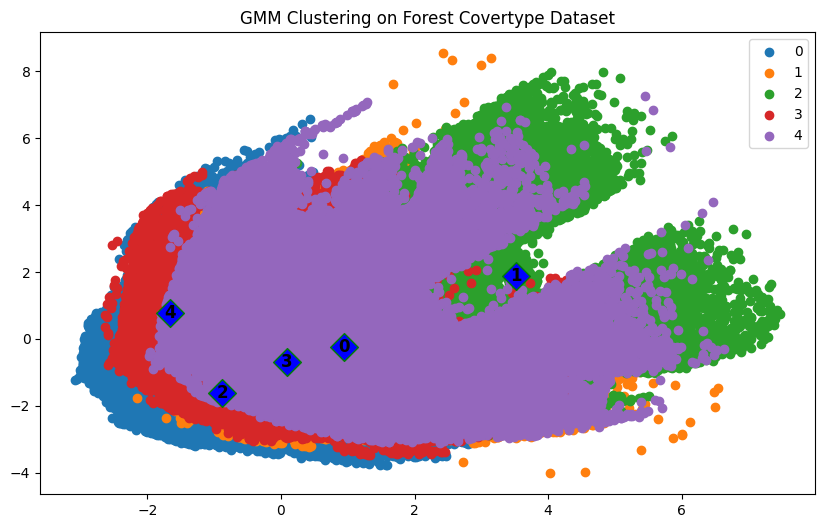

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5,n_init=25 ,random_state=1234)
gmm.fit(pca_Concated_data)
cluster_labels_gmm = gmm.predict(pca_Concated_data)
centroids_of_Clusters_gmm = gmm.means_
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.scatter(pca_Concated_data[cluster_labels == i, 0], pca_Concated_data[cluster_labels == i, 1], label=i)
plt.title('GMM Clustering on Forest Covertype Dataset')
for i, centroid in enumerate(centroids_of_Clusters_gmm):
    plt.scatter(centroid[0], centroid[1], s = 200, color = 'b', marker = 'D', ec='green')
    plt.text(centroid[0], centroid[1], str(i), ha='center', va='center', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN # it is essential to find the right parameters for this clustering algori.
param_grid = {
    'eps': [0.5],
    'min_samples': [15, 20]
}

# Iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    cluster_labels = dbscan.fit_predict(pca_Concated_data)
    # Skip if all points are labeled as noise (-1)
    if len(set(cluster_labels)) == 1:
        continue
    # Calculate silhouette score
    score = silhouette_score(pca_Concated_data, cluster_labels)
    # Print the silhouette score for the current iteration as it took long to calculate in loop
    print("Parameters:", params, "Silhouette Score:", score)

Parameters: {'eps': 0.5, 'min_samples': 15} Silhouette Score: -0.410524500801907
Parameters: {'eps': 0.5, 'min_samples': 20} Silhouette Score: -0.3837343627828353


In [ ]:
from sklearn.metrics import silhouette_score
param_grid = {
    'eps': [ 1.0],
    'min_samples': [15, 20]
}

# Iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    cluster_labels = dbscan.fit_predict(pca_Concated_data)
    # Skip if all points are labeled as noise (-1)
    if len(set(cluster_labels)) == 1:
        continue
    # Calculate silhouette score
    score = silhouette_score(pca_Concated_data, cluster_labels)
    # Print the silhouette score for the current iteration
    print("Parameters:", params, "Silhouette Score:", score)

Parameters: {'eps': 1.0, 'min_samples': 15} Silhouette Score: 0.12800857240550242
Parameters: {'eps': 1.0, 'min_samples': 20} Silhouette Score: 0.152231328562392


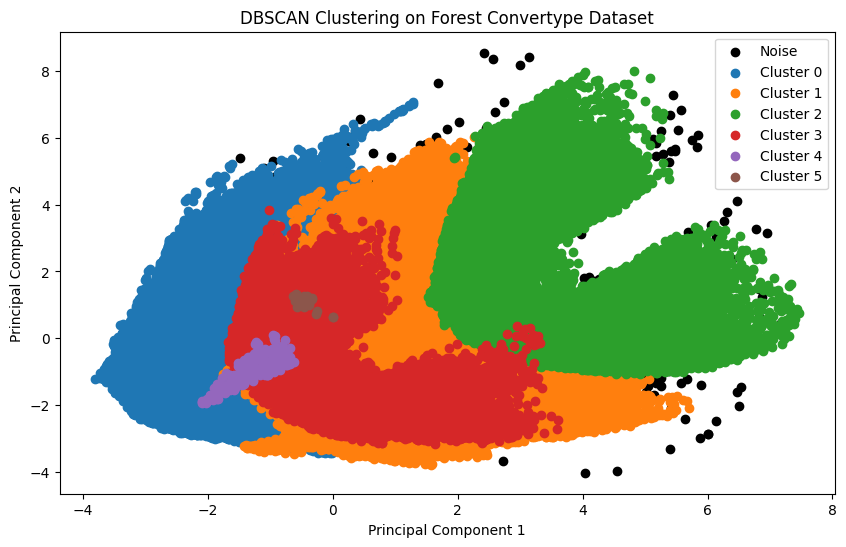

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=20)
dbscan.fit(pca_Concated_data)
cluster_labels_dbscan = dbscan.labels_
# Plot the clusters
plt.figure(figsize=(10, 6))
for label in np.unique(cluster_labels_dbscan):
    if label == -1:    # Plot noise points as black as per condition.
       plt.scatter(pca_Concated_data[cluster_labels_dbscan == label, 0],
                    pca_Concated_data[cluster_labels_dbscan == label, 1],
                    color='black', label='Noise')
    else:
        plt.scatter(pca_Concated_data[cluster_labels_dbscan == label, 0],
                    pca_Concated_data[cluster_labels_dbscan == label, 1],
                    label=f'Cluster {label}')

plt.title('DBSCAN Clustering on Forest Convertype Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

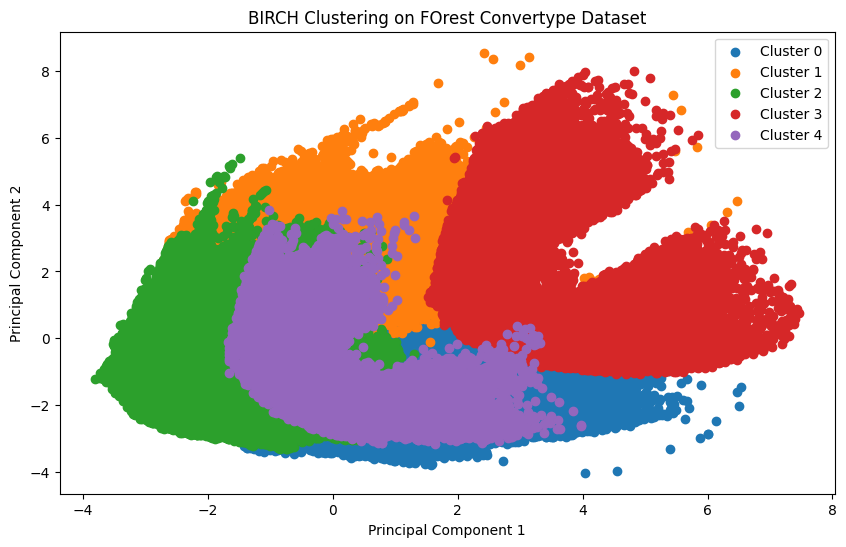

In [ ]:
from sklearn.cluster import Birch
birch_clustering = Birch(n_clusters=5)
cluster_labels_birch = birch_clustering.fit_predict(pca_Concated_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
for label in np.unique(cluster_labels_birch):
    plt.scatter(pca_Concated_data[cluster_labels_birch == label, 0],
                pca_Concated_data[cluster_labels_birch == label, 1],
                label=f'Cluster {label}')
plt.title('BIRCH Clustering on FOrest Convertype Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


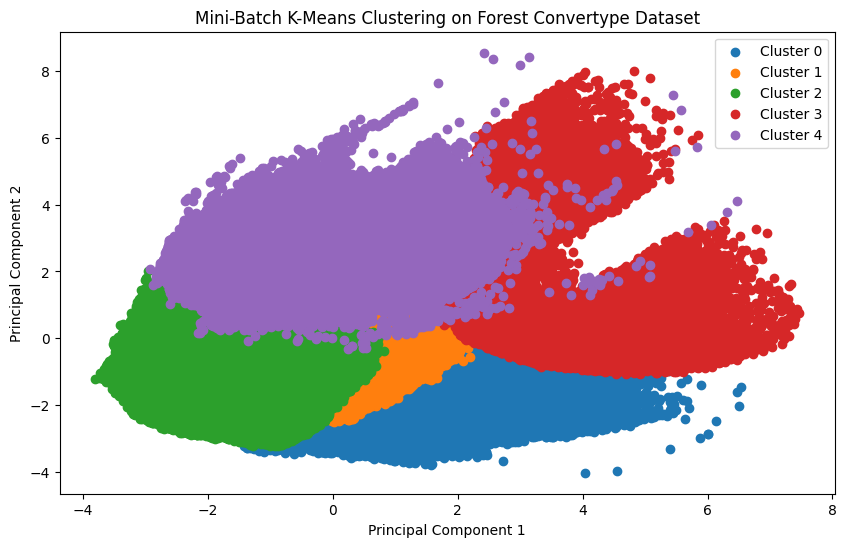

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=1234)
minibatch_kmeans.fit(pca_Concated_data)
cluster_labels_minibatch = minibatch_kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for label in np.unique(cluster_labels_minibatch):
    plt.scatter(pca_Concated_data[cluster_labels_minibatch == label, 0],
                pca_Concated_data[cluster_labels_minibatch == label, 1],
                label=f'Cluster {label}')
plt.title('Mini-Batch K-Means Clustering on Forest Convertype Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Evaluation (code)

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
true_labels_str = df_target['target']
label_map = {label: i for i, label in enumerate(np.unique(true_labels_str))}
true_labels_int = np.array([label_map[label] for label in true_labels_str])

In [ ]:
ari_kmeans = adjusted_rand_score(true_labels_int, cluster_labels_kmeans)
ami_kmeans = adjusted_mutual_info_score(true_labels_int, cluster_labels_kmeans)

# now collecting respective ari and ami scores for each clustering algorithms we used.
ari_gmm = adjusted_rand_score(true_labels_int, cluster_labels_gmm)
ami_gmm = adjusted_mutual_info_score(true_labels_int, cluster_labels_gmm)

ari_dbscan = adjusted_rand_score(true_labels_int, cluster_labels_dbscan)
ami_dbscan = adjusted_mutual_info_score(true_labels_int, cluster_labels_dbscan)

ari_birch = adjusted_rand_score(true_labels_int, cluster_labels_birch)
ami_birch = adjusted_mutual_info_score(true_labels_int, cluster_labels_birch)

ari_minibatch = adjusted_rand_score(true_labels_int, cluster_labels_minibatch)
ami_minibatch = adjusted_mutual_info_score(true_labels_int, cluster_labels_minibatch)



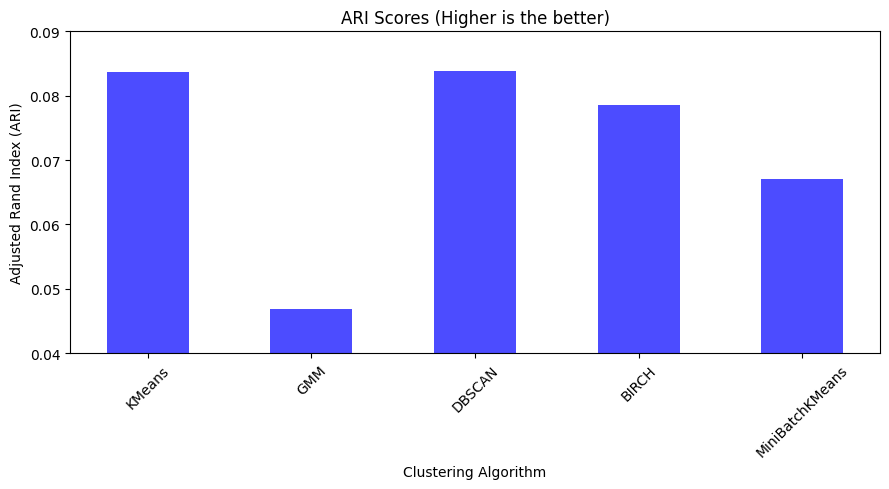

In [ ]:
ari_scores = [ari_kmeans, ari_gmm, ari_dbscan, ari_birch, ari_minibatch]
ami_scores = [ami_kmeans, ami_gmm, ami_dbscan, ami_birch, ami_minibatch]
algorithm_names = ['KMeans', 'GMM', 'DBSCAN', 'BIRCH', 'MiniBatchKMeans']

# Plotting ARI scores
plt.figure(figsize=(9, 5))
plt.bar(algorithm_names, ari_scores, color='blue', alpha=0.7, width=0.5)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('ARI Scores (Higher is the better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0.04, 0.09)
plt.show()




In [ ]:
print("ARI Scores:")
for algorithm, ari_score in zip(algorithm_names, ari_scores):
    print(f"{algorithm}: {ari_score:.4f}")

ARI Scores:
KMeans: 0.0837
GMM: 0.0469
DBSCAN: 0.0838
BIRCH: 0.0786
MiniBatchKMeans: 0.0671


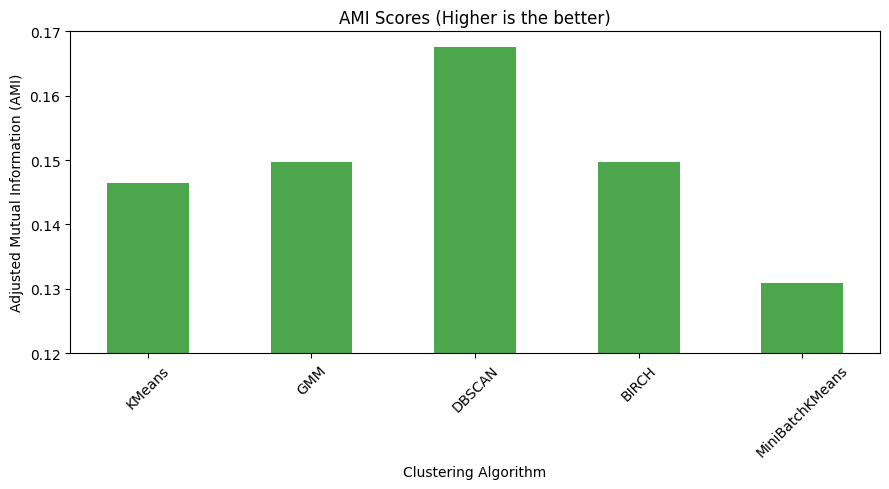

In [ ]:
plt.figure(figsize=(9, 5))
plt.bar(algorithm_names, ami_scores, color='green', alpha=0.7, width=0.5)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Adjusted Mutual Information (AMI)')
plt.title('AMI Scores (Higher is the better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0.12, 0.17)
plt.show()

In [ ]:
print("AMI Scores:")
for algorithm, ami_score in zip(algorithm_names, ami_scores):
    print(f"{algorithm}: {ami_score:.4f}")


AMI Scores:
KMeans: 0.1465
GMM: 0.1497
DBSCAN: 0.1675
BIRCH: 0.1497
MiniBatchKMeans: 0.1309


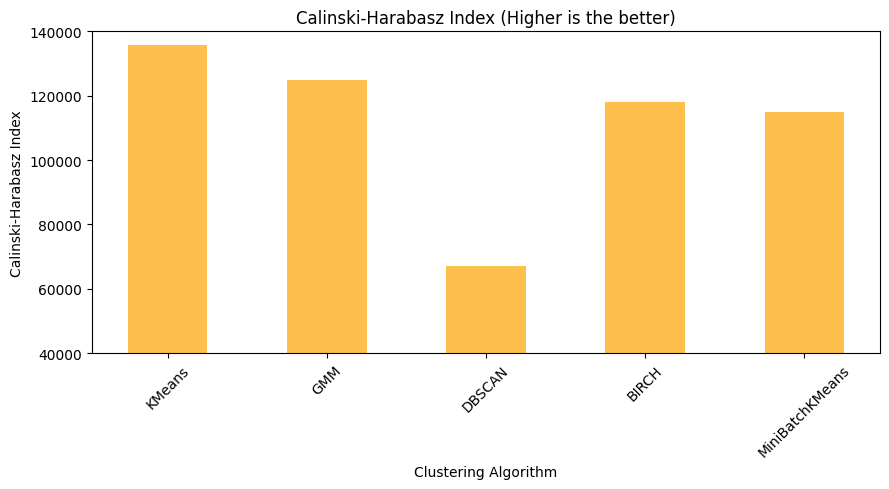

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
calinski_harabasz_scores = [calinski_harabasz_score(pca_Concated_data, cluster_labels_kmeans),
             calinski_harabasz_score(pca_Concated_data, cluster_labels_gmm),
             calinski_harabasz_score(pca_Concated_data, cluster_labels_dbscan),
             calinski_harabasz_score(pca_Concated_data, cluster_labels_birch),
             calinski_harabasz_score(pca_Concated_data, cluster_labels_minibatch)]
davies_bouldin_scores = [davies_bouldin_score(pca_Concated_data, cluster_labels_kmeans),
             davies_bouldin_score(pca_Concated_data, cluster_labels_gmm),
             davies_bouldin_score(pca_Concated_data, cluster_labels_dbscan),
             davies_bouldin_score(pca_Concated_data, cluster_labels_birch),
             davies_bouldin_score(pca_Concated_data, cluster_labels_minibatch)]

# Plotting Calinski-Harabasz index
plt.figure(figsize=(9, 5))
plt.bar(algorithm_names, calinski_harabasz_scores, color='orange', alpha=0.7, width=0.5)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index (Higher is the better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(40000, 140000)
plt.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Compute and print Calinski-Harabasz score for each algorithm we used.
print("Calinski-Harabasz Scores:")
for algorithm, labels in zip(algorithm_names, [cluster_labels_kmeans, cluster_labels_gmm, cluster_labels_dbscan, cluster_labels_birch, cluster_labels_minibatch]):
    calinski_score = calinski_harabasz_score(pca_Concated_data, labels)
    print(f"{algorithm}: {calinski_score:.2f}")




Calinski-Harabasz Scores:
KMeans: 135610.39
GMM: 124867.79
DBSCAN: 67159.24
BIRCH: 117945.09
MiniBatchKMeans: 114939.28


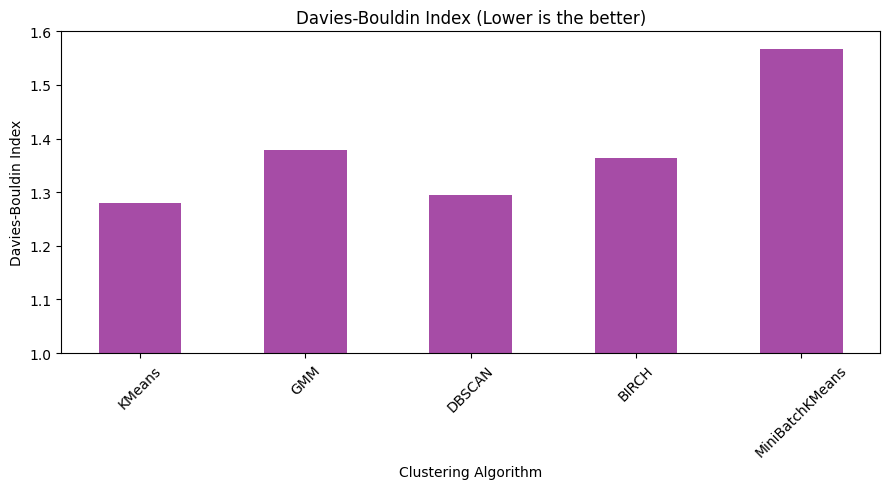

In [ ]:
# Plotting Davies-Bouldin index
plt.figure(figsize=(9, 5))
plt.bar(algorithm_names, davies_bouldin_scores, color='purple', alpha=0.7, width=0.5)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index (Lower is the better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(1, 1.6)
plt.show()

In [ ]:
print("\nDavies-Bouldin Scores:")
for algorithm, labels in zip(algorithm_names, [cluster_labels_kmeans, cluster_labels_gmm, cluster_labels_dbscan, cluster_labels_birch, cluster_labels_minibatch]):
    davies_score = davies_bouldin_score(pca_Concated_data, labels)
    print(f"{algorithm}: {davies_score:.2f}")


Davies-Bouldin Scores:
KMeans: 1.28
GMM: 1.38
DBSCAN: 1.29
BIRCH: 1.36
MiniBatchKMeans: 1.57


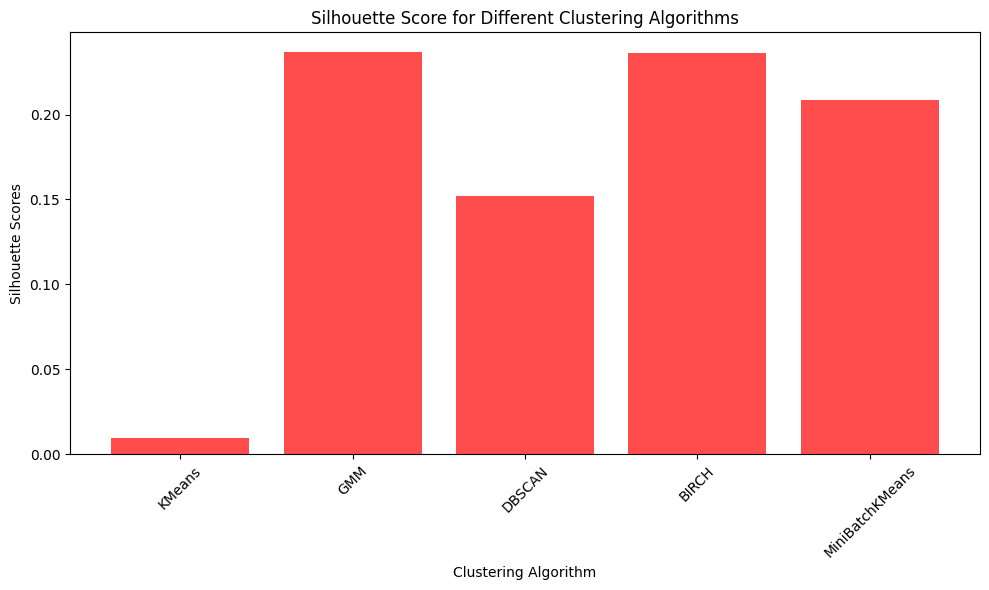

In [ ]:
from sklearn.metrics import silhouette_score

# now here we are going to collect the respective silhotte scores for each clustering algorithms we used.
silhouette_scores = [silhouette_score(pca_Concated_data, cluster_labels),
                     silhouette_score(pca_Concated_data, cluster_labels_gmm),
                     silhouette_score(pca_Concated_data, cluster_labels_dbscan),
                     silhouette_score(pca_Concated_data, cluster_labels_birch),
                     silhouette_score(pca_Concated_data, cluster_labels_minibatch)]

# Plotting silhouette score
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, silhouette_scores, color='red', alpha=0.7, width=0.5)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Score for Different Clustering Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score_gmm = silhouette_score(pca_Concated_data, cluster_labels_gmm)
print("Silhouette Score for GMM:", silhouette_score_gmm)
silhouette_score_birch = silhouette_score(pca_Concated_data, cluster_labels_birch)
print("Silhouette Score for BIRCH:", silhouette_score_birch)


Silhouette Score for GMM: 0.236628973905092
Silhouette Score for BIRCH: 0.2305806786318038


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
covariance_types = ['spherical', 'tied', 'diag']
for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=5, covariance_type=cov_type, random_state=1234)
    cluster_labels = gmm.fit_predict(pca_Concated_data)
    silhouette_avg = silhouette_score(pca_Concated_data, cluster_labels)
    print(f"Silhouette Score for Covariance Type '{cov_type}':", silhouette_avg)


Silhouette Score for Covariance Type 'spherical': 0.17630894697300273
Silhouette Score for Covariance Type 'tied': 0.20741624093916447
Silhouette Score for Covariance Type 'diag': 0.1544042149049389


# Part II: Classification

## Classification methods used

The classification methods used are as follows:


1.  Decision Tree
2.  Random Forest
3.  KNN
4.  Linear Regression
5.  Logistic Regression
6.  Naive Bayes



## Training (code)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_covtype
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize


In [ ]:
#importing the dataset
data = fetch_covtype()
dataset = pd.DataFrame(data=data['data'],columns=data['feature_names'])
print(dataset)

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596.0    51.0    3.0                             258.0   
1          2590.0    56.0    2.0                             212.0   
2          2804.0   139.0    9.0                             268.0   
3          2785.0   155.0   18.0                             242.0   
4          2595.0    45.0    2.0                             153.0   
...           ...     ...    ...                               ...   
581007     2396.0   153.0   20.0                              85.0   
581008     2391.0   152.0   19.0                              67.0   
581009     2386.0   159.0   17.0                              60.0   
581010     2384.0   170.0   15.0                              60.0   
581011     2383.0   165.0   13.0                              60.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0.0                            510.0   
1        

In [ ]:
#spliting the data into training, testing and validation
from sklearn.model_selection import train_test_split
x = dataset.copy()
y = data['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
#training the classifiers below
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
#Predict the test set labels
y_pred_tree = tree.predict(x_test)
y_pred_proba = tree.predict_proba(x_test)

#compute balanced accuracy, precision, recall and f1 score
balanced_acc_tree = balanced_accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
roc_auc_tree = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

#print the computed results
print(f"Decision Tree Balanced Accuracy: {balanced_acc_tree:.2f}")
print(f"Decision Tree Precision: {precision_tree:.2f}")
print(f"Decision Tree Recall: {recall_tree:.2f}")
print(f"Decision Tree F1: {f1_tree:.2f}")
print(f"Decision Tree roc_auc_score: {roc_auc_tree:.2f}")


Decision Tree Balanced Accuracy: 0.90
Decision Tree Precision: 0.94
Decision Tree Recall: 0.94
Decision Tree F1: 0.94
Decision Tree roc_auc_score: 0.95


In [ ]:
#Predict the test set labels
y_pred_forest = forest.predict(x_test)
y_pred_proba_f = forest.predict_proba(x_test)

#compute balanced accuracy, precision, recall and f1 score
balanced_acc_forest = balanced_accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')
roc_auc_forest = roc_auc_score(y_test, y_pred_proba_f, average='weighted', multi_class='ovr')

#print the computed results
print(f"Random Forest Balanced Accuracy:{balanced_acc_forest:.2f}")
print(f"Random Forest Precision:{precision_forest:.2f}")
print(f"Random Forest Recall:{recall_forest:.2f}")
print(f"Random Forest F1:{f1_forest:.2f}")
print(f"Random Forest roc_auc_score:{roc_auc_forest:.2f}")

Random Forest Balanced Accuracy:0.90
Random Forest Precision:0.95
Random Forest Recall:0.95
Random Forest F1:0.95
Random Forest roc_auc_score:1.00


In [ ]:
#Predict the test set labels
y_pred_log = logreg.predict(x_test)
y_pred_proba_log = logreg.predict_proba(x_test)

#compute balanced accuracy, precision, recall and f1 score
balanced_acc_log = balanced_accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log, average='weighted', multi_class='ovr')

#print the computed results
print(f"Logistic Regression Balanced Accuracy:{balanced_acc_log:.2f}")
print(f"Logistic Regression Precision:{precision_log:.2f}")
print(f"Logistic Regression Recall:{recall_log:.2f}")
print(f"Logistic Regression F1:{f1_log:.2f}")
print(f"Logistic Regression roc_auc_score:{roc_auc_log:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Balanced Accuracy:0.23
Logistic Regression Precision:0.57
Logistic Regression Recall:0.62
Logistic Regression F1:0.59
Logistic Regression roc_auc_score:0.77


In [ ]:
#Predict the test set labels
y_pred_lin = linear_reg.predict(x_test)
y_pred_class = [1 if pred > 0.5 else 0 for pred in y_pred_lin]

#compute balanced accuracy, precision, recall and f1 score
balanced_acc_lin = balanced_accuracy_score(y_test, y_pred_class)
precision_lin = precision_score(y_test, y_pred_class, average='weighted')
recall_lin = recall_score(y_test, y_pred_class, average='weighted')
f1_lin = f1_score(y_test, y_pred_class, average='weighted')

#print the computed results
print(f"Linear Regression Balanced Accuracy: {balanced_acc_lin:.2f}")
print(f"Linear Regression Precision: {precision_lin:.2f}")
print(f"Linear Regression Recall: {recall_lin:.2f}")
print(f"Linear Regression F1: {f1_lin:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear Regression Balanced Accuracy: 0.14
Linear Regression Precision: 0.13
Linear Regression Recall: 0.36
Linear Regression F1: 0.20


In [ ]:
#Predict the test set labels
y_pred_knn = knn.predict(x_test)
y_pred_proba_knn = knn.predict_proba(x_test)

#compute balanced accuracy, precision, recall and f1 score
balanced_acc_knn = balanced_accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn, average='weighted', multi_class='ovr')

#print the computed results
print(f"KNN Balanced Accuracy:{balanced_acc_knn:.2f}")
print(f"KNN Forest Precision:{precision_knn:.2f}")
print(f"KNN Forest Recall:{recall_knn:.2f}")
print(f"KNN Forest F1:{f1_knn:.2f}")
print(f"KNN Forest roc_auc_score:{roc_auc_knn:.2f}")

KNN Balanced Accuracy:0.93
KNN Forest Precision:0.97
KNN Forest Recall:0.97
KNN Forest F1:0.97
KNN Forest roc_auc_score:1.00


In [ ]:
#Predict the test set labels
y_pred_nb = nb.predict(x_test)
y_pred_proba_nb = nb.predict_proba(x_test)

#compute balanced accuracy, precision, recall and f1 score
balanced_acc_nb = balanced_accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb, average='weighted', multi_class='ovr')

#print the computed results
print(f"NB Balanced Accuracy:{balanced_acc_nb:.2f}")
print(f"NB Forest Precision:{precision_nb:.2f}")
print(f"NB Forest Recall:{recall_nb:.2f}")
print(f"NB Forest F1:{f1_nb:.2f}")
print(f"NB Forest roc_auc_score:{roc_auc_nb:.2f}")

NB Balanced Accuracy:0.58
NB Forest Precision:0.64
NB Forest Recall:0.46
NB Forest F1:0.42
NB Forest roc_auc_score:0.78


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


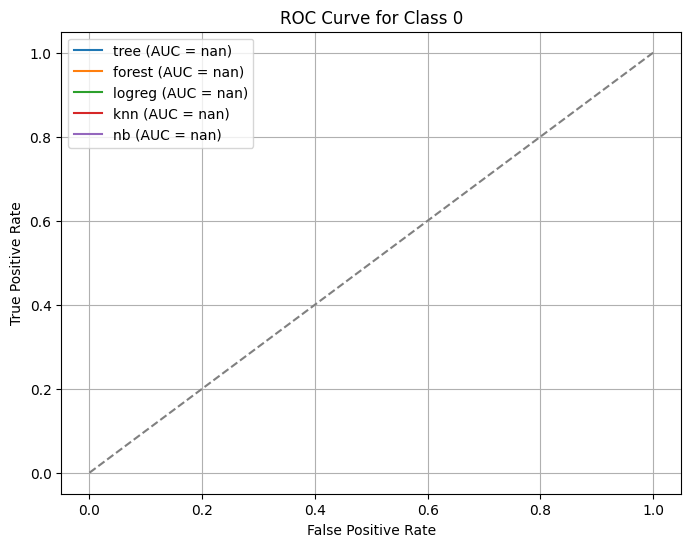

In [ ]:
#create a dictionary and store the classifiers and the y_predicted_probability in key value pairs
y_proba_dict = {'tree': y_pred_proba, 'forest': y_pred_proba_f, 'logreg': y_pred_proba_log, 'knn': y_pred_proba_knn, 'nb': y_pred_proba_nb}

#plot the roc curve for class 0 of all classifiers in single graph
def plot_roc_curve_for_class(y_test, y_proba_dict, class_index):
    plt.figure(figsize=(8, 6))

    for classifier_name, y_pred_prob in y_proba_dict.items():
        fpr, tpr, _ = roc_curve(y_test == class_index, y_pred_prob[:, class_index])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_index}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve_for_class(y_test, y_proba_dict, class_index=0)

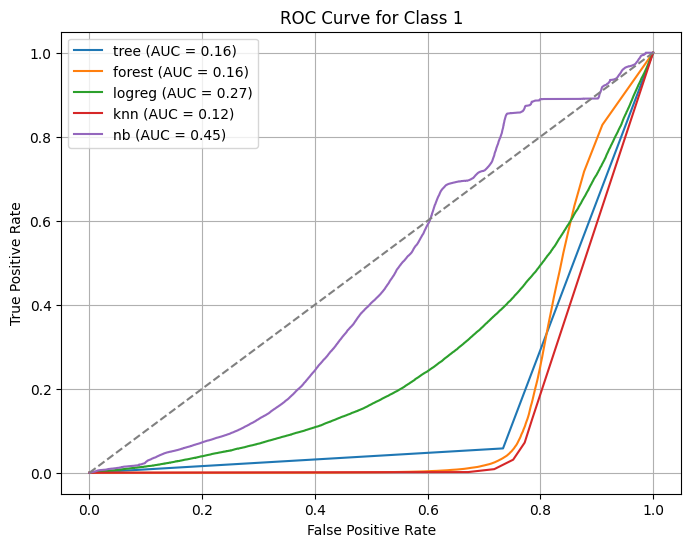

In [ ]:
#plot the roc curve for class 0 of all classifiers in single graph
def plot_roc_curve_for_class(y_test, y_proba_dict, class_index):
    plt.figure(figsize=(8, 6))

    for classifier_name, y_pred_prob in y_proba_dict.items():
        fpr, tpr, _ = roc_curve(y_test == class_index, y_pred_prob[:, class_index])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_index}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve_for_class(y_test, y_proba_dict, class_index=1)

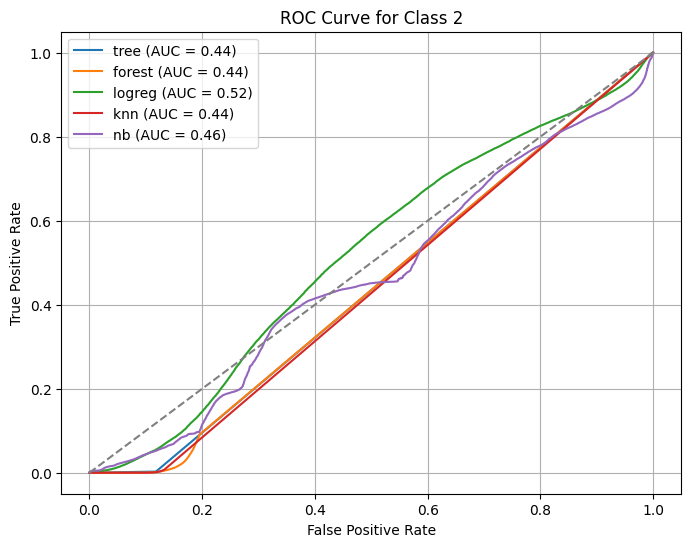

In [ ]:
#plot the roc curve for class 0 of all classifiers in single graph
def plot_roc_curve_for_class(y_test, y_proba_dict, class_index):
    plt.figure(figsize=(8, 6))

    for classifier_name, y_pred_prob in y_proba_dict.items():
        fpr, tpr, _ = roc_curve(y_test == class_index, y_pred_prob[:, class_index])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_index}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve_for_class(y_test, y_proba_dict, class_index=2)

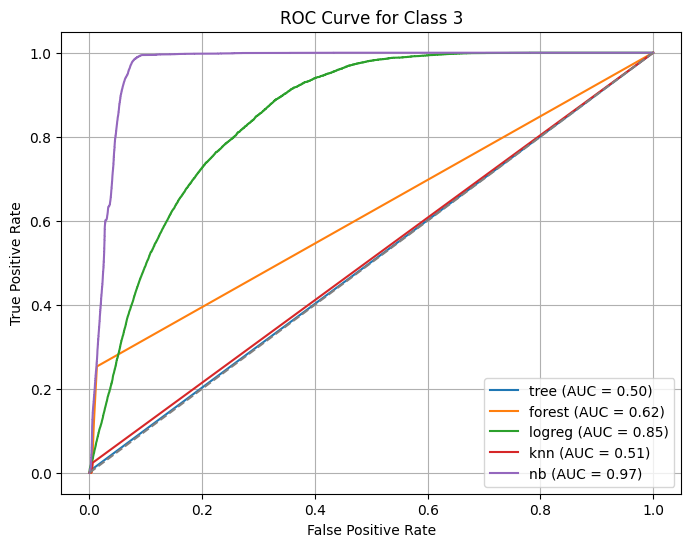

In [ ]:
#plot the roc curve for class 0 of all classifiers in single graph
def plot_roc_curve_for_class(y_test, y_proba_dict, class_index):
    plt.figure(figsize=(8, 6))

    for classifier_name, y_pred_prob in y_proba_dict.items():
        fpr, tpr, _ = roc_curve(y_test == class_index, y_pred_prob[:, class_index])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_index}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve_for_class(y_test, y_proba_dict, class_index=3)

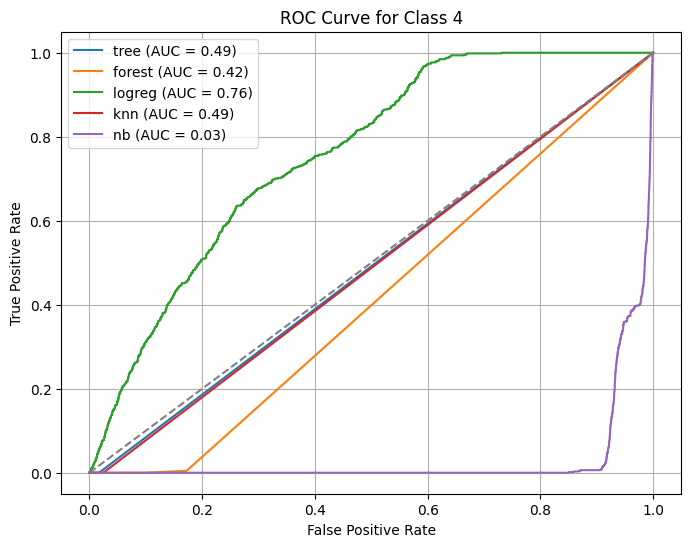

In [ ]:
#plot the roc curve for class 0 of all classifiers in single graph
def plot_roc_curve_for_class(y_test, y_proba_dict, class_index):
    plt.figure(figsize=(8, 6))

    for classifier_name, y_pred_prob in y_proba_dict.items():
        fpr, tpr, _ = roc_curve(y_test == class_index, y_pred_prob[:, class_index])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_index}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve_for_class(y_test, y_proba_dict, class_index=4)

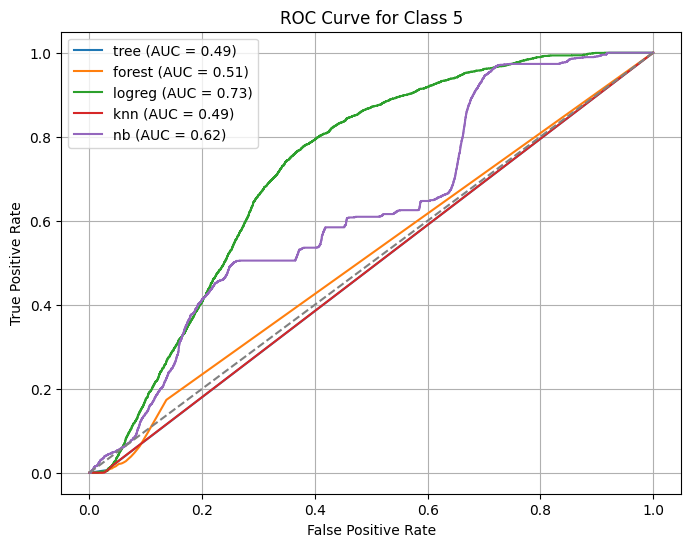

In [ ]:
#plot the roc curve for class 0 of all classifiers in single graph
def plot_roc_curve_for_class(y_test, y_proba_dict, class_index):
    plt.figure(figsize=(8, 6))

    for classifier_name, y_pred_prob in y_proba_dict.items():
        fpr, tpr, _ = roc_curve(y_test == class_index, y_pred_prob[:, class_index])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_index}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve_for_class(y_test, y_proba_dict, class_index=5)

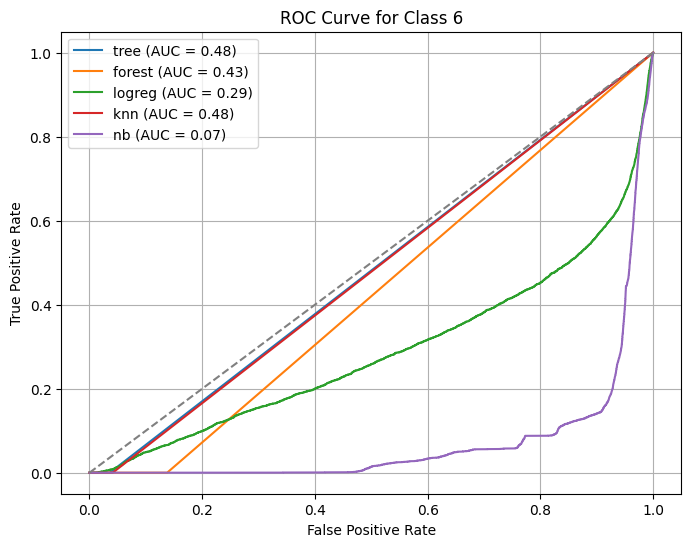

In [ ]:
#plot the roc curve for class 0 of all classifiers in single graph
def plot_roc_curve_for_class(y_test, y_proba_dict, class_index):
    plt.figure(figsize=(8, 6))

    for classifier_name, y_pred_prob in y_proba_dict.items():
        fpr, tpr, _ = roc_curve(y_test == class_index, y_pred_prob[:, class_index])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_index}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve_for_class(y_test, y_proba_dict, class_index=6)

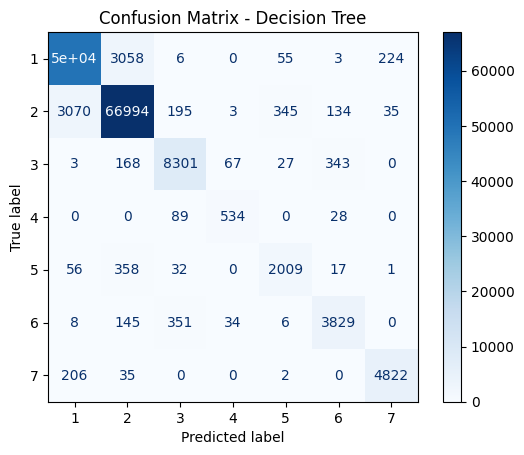

In [ ]:
y_pred = tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.show()

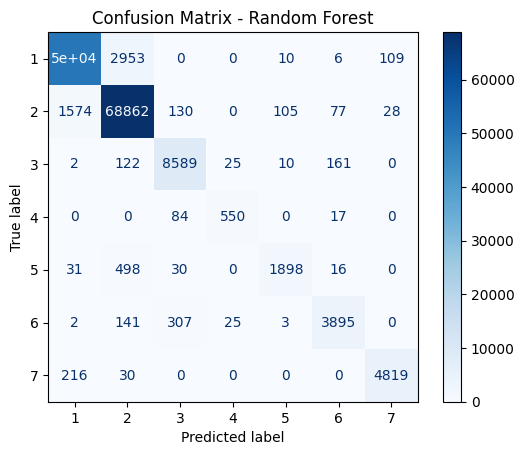

In [ ]:
y_pred_f = forest.predict(x_test)
cm = confusion_matrix(y_test, y_pred_f)

# Plot confusion matrix
disp_f = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp_f.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

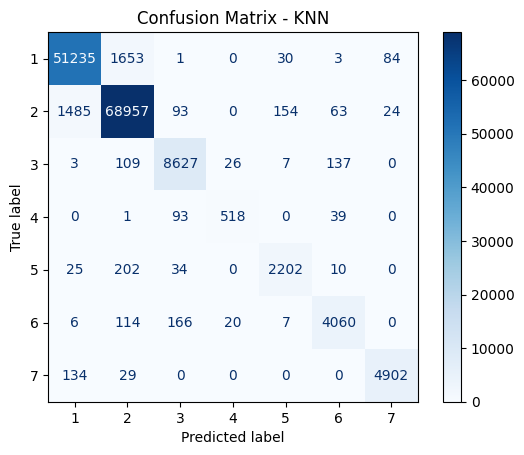

In [ ]:
y_pred_kn = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_kn)

# Plot confusion matrix
disp_kn = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp_kn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.show()

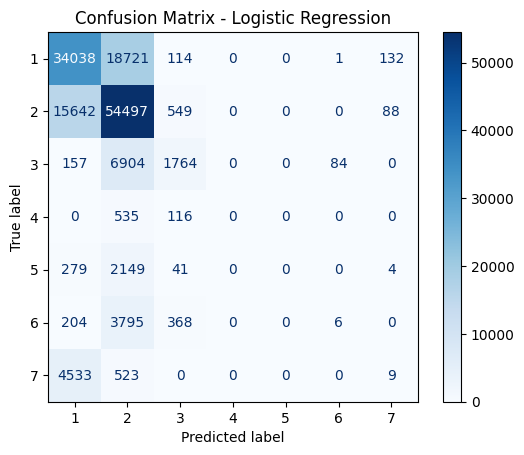

In [ ]:
y_pred_log = logreg.predict(x_test)
cm = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp_log.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

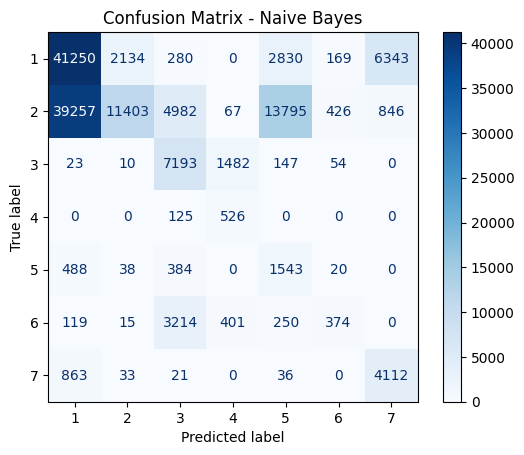

In [ ]:
y_pred_nb = nb.predict(x_test)
cm = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

## Evaluation (code)

In [ ]:
#add code for evaluation
#performing cross validation for classifiers below
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(forest, x, y, cv=kfold, scoring='accuracy')
print("Cross-Validation Scores for Random Forest:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores for Random Forest: [0.95448482 0.95525933 0.95465655 0.95627442 0.9556376 ]
Mean Accuracy: 0.9552625432537226


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores_tree = cross_val_score(tree, x, y, cv=kfold, scoring='accuracy')
print("Cross-Validation Scores for Decision Tree:", scores_tree)
print("Mean Accuracy:", np.mean(scores_tree))

Cross-Validation Scores for Decision Tree: [0.93862465 0.93882258 0.9399494  0.9392007  0.94108535]
Mean Accuracy: 0.9395365356065714


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores_knn = cross_val_score(knn, x, y, cv=kfold, scoring='accuracy')
print("Cross-Validation Scores for KNN:", scores_knn)
print("Mean Accuracy:", np.mean(scores_knn))

Cross-Validation Scores for KNN: [0.96869272 0.96938117 0.96884735 0.96825356 0.96926043]
Mean Accuracy: 0.9688870448462368


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores_nb = cross_val_score(nb, x, y, cv=kfold, scoring='accuracy')
print("Cross-Validation Scores for Naive Bayes:", scores_nb)
print("Mean Accuracy:", np.mean(scores_nb))

Cross-Validation Scores for Naive Bayes: [0.45688149 0.45937712 0.46012117 0.45839142 0.46055145]
Mean Accuracy: 0.45906453200699404


# References (text)


1.  Breiman, L. (2001) *Random forests* , RANDOM FORESTS-Leo Breiman Statistics Department University of California Berkeley, CA 94720. Available at: https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf.

2.  Capó, M., Pérez, A. and Lozano, J.A., 2017. *An efficient approximation to the K-means clustering for massive data.* Knowledge-Based Systems, 117, pp.56-69. Available at : https://doi.org/10.1016/j.knosys.2016.06.031

3.  Cunningham, P. and Delany, S.J. (2020) *K-nearest neighbour classifiers: 2nd edition (with python examples)*, arXiv.org. Available at: https://arxiv.org/abs/2004.04523.

4.  Idelbayev, Y., Assignment 1. *Predicting cover of forest.* Available at: https://cseweb.ucsd.edu/classes/wi15/cse255-a/reports/wi15/Yerlan_Idelbayev.pdf

5.  Lorbeer, B., Kosareva, A., Deva, B., Softić, D., Ruppel, P. and Küpper, A., 2018. *Variations on the clustering algorithm BIRCH.* Big data research, 11, pp.44-53.  Available at: https://doi.org/10.1016/j.bdr.2017.09.002  

6.  Mihaescu, C.M. (2011) *Classification of learners using linear regression*., ResearchGate. Available at: https://www.researchgate.net/publication/261459856_Classification_of_Learners_Using_Linear_Regression

7.  Nwanganga, F. (2022) Machine Learning with Python: k-Means Clustering, LinkedIn. Available at: https://www.linkedin.com/learning/machine-learning-with-python-k-means-clustering/getting-started-with-python-and-k-means-clustering?u=56743409  

8.   Rish, I. (2001) *An empirical study of the naive bayes classifier*, ResearchGate. Available at: https://faculty.cc.gatech.edu/~isbell/reading/papers/Rish.pdf.

9.  Xu, Z., Shen, D., Nie, T., Kou, Y., Yin, N. and Han, X., 2021. *A cluster-based oversampling algorithm combining SMOTE and k-means for imbalanced medical data.* Information Sciences, 572, pp.574-589. Available at: https://doi.org/10.1016/j.ins.2021.02.056

---











